In [160]:
#QP
from qiskit import *
from qiskit.tools.visualization import plot_histogram
%matplotlib inline

#task1

def QP(index):
    circuit1 = QuantumCircuit(1,1)
    circuit2 = QuantumCircuit(1,1)
    if index ==0:
        circuit1.h(0)
        circuit1.measure(0,0)
        return circuit1
    elif index == 1:
        circuit2.z(0)
        circuit2.measure(0,0)
        return circuit2
        
    


    

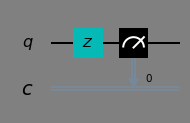

In [161]:
x = QP(1)
x.draw(output = "mpl" ,style = {'backgroundcolor':'gray'})

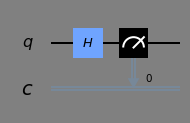

In [162]:
y = QP(0)
y.draw(output = "mpl" ,style = {'backgroundcolor':'gray'})

In [163]:
#task 2
from qiskit.tools.visualization import plot_histogram

import random 
  

def QP(p,trails):
    circuit1 = QuantumCircuit(1,1)
    circuit2 = QuantumCircuit(1,1)
    count1,count2 =0,0
    stat ={}
    for i in range(trails):
        rand = random.uniform(0, 1)
        if rand <p:
            circuit1.h(0)
            circuit1.measure(0,0)
            count1+=1
            stat['circuit1'] = count1
            
            
        else:
            circuit2.z(0)
            circuit2.measure(0,0)
            count2+=1
            stat['circuit2'] = count2
            
    return stat

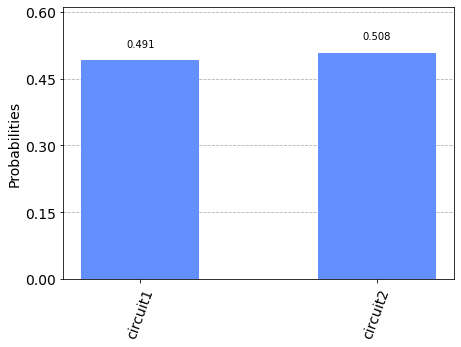

In [164]:
y = QP(0.5,10000)
plot_histogram(y)

In [165]:
#task 3

from qiskit import *
from qiskit.tools.visualization import plot_histogram
%matplotlib inline
import random
import numpy as np
from collections import Counter



def QP(n,circuit_list,prob_distr,trails):
    
    stat ={}
    sum_1 = sum(prob_distr)
    if int(sum_1) == 1:
        temp_list = np.arange(len(circuit_list))
        for i in range(trails):
            #Circuit = QuantumCircuit(n,n)
            element = np.random.choice(temp_list, 1,p=prob_distr)

            #measurement
            circuit_list[int(element)].measure(range(n),range(n))

            sim = Aer.get_backend('qasm_simulator')
            result = execute(circuit_list[int(element)],backend = sim).result()


            stat = Counter(stat) + Counter(result.get_counts())  
                    
            
        return stat
    else:
        count = 0
        temp= QuantumCircuit(1)
        circuit_list.append(temp)
        x = 1-sum(prob_distr)
        prob_distr.append(x)
        temp_list = np.arange(len(circuit_list))
        while(count<trails):
            #Circuit = QuantumCircuit(n,n)
            element = np.random.choice(temp_list, 1,p=prob_distr)
            #print(element)
            #print(" ")
            if element != temp_list[-1]:
                #measurement
                circuit_list[int(element)].measure(range(n),range(n))

                sim = Aer.get_backend('qasm_simulator')
                result = execute(circuit_list[int(element)],backend = sim).result()

                stat = Counter(stat) + Counter(result.get_counts())  

                count+=1
            else:
                pass

        return stat

        


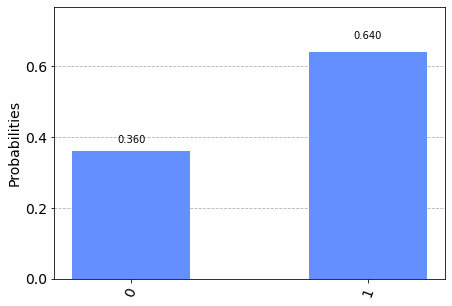

In [166]:

stat =QP(1,[c1,c2,c3],[0.1,0.4,0.5],100)
plot_histogram(stat)

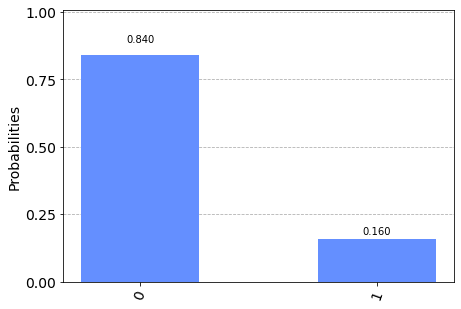

In [167]:
stat = QP(1,[c1,c2,c3],[0.1,0.1,0.8],100)
plot_histogram(stat)

In [168]:
#task 4
def store_prob_cir(circuit_list,prob_distr):
    m = len(circuit_list)
    n = len(prob_distr)
    
    if m == n:
        with open("Coutput.txt", "w") as txt_file:
            
            for i in circuit_list:
                txt_file.write(i.qasm())
            txt_file.write('end\n')
            
            for i in prob_distr:
                txt_file.write(str(i)+'\n')
                
    else:
        print("INVAILID INPUT: LEN ERROR")

        
        
def read_prob_cir(PATH):
    result =[]
    cir =[]
    prob =[]
    
    with open(PATH) as f:
        lines = f.readlines()
        x = len(lines)
        y =0
        for i in range(x-1):
            if str(lines[i]) == 'OPENQASM 2.0;\n':
                string_q = """OPENQASM 2.0;"""
                j =i+1
                while(lines[j]!= 'OPENQASM 2.0;\n'):
                    if lines[j] =='end\n':
                        for k in range(j,x-1):
                            prob.append(float(lines[k+1]))
                        break
                    string_q = string_q+lines[j]
                    j+=1

                c = QuantumCircuit.from_qasm_str(string_q)
                cir.append(c)
    if len(prob) == len(cir):
        for i in range(len(prob)):
            result.append([prob[i],cir[i]])
            
    return result
                
                
                

In [169]:
c1=QuantumCircuit(1,1)
c1.x(0)
c2=QuantumCircuit(1,1)
c2.y(0)
c3=QuantumCircuit(1,1)
c3.z(0)


store_prob_cir([c1,c2,c3],[0.5,0.1,0.4])

In [170]:
path = 'Coutput.txt'
t = read_prob_cir(path)
t

[[0.5, <qiskit.circuit.quantumcircuit.QuantumCircuit at 0x7fed34c25610>],
 [0.1, <qiskit.circuit.quantumcircuit.QuantumCircuit at 0x7fed35de6a30>],
 [0.4, <qiskit.circuit.quantumcircuit.QuantumCircuit at 0x7fed35350550>]]

In [171]:
#task 5

from qiskit.quantum_info import Choi

def return_choi(n, PATH,trails =1000):
    
    agri_choi =[]
    prob_cir = read_prob_cir(PATH)
    
    prob_distr =[i[0] for i in prob_cir]
    circuit_list = [i[1] for i in prob_cir]
    
    stat ={}
    sum_1 = sum(prob_distr)
    
    Circuit = QuantumCircuit(n,n)
    choi = Choi(Circuit)
    
    temp_list = np.arange(len(circuit_list))
    
    if int(sum_1) == 1:
        for i in range(trails):
            
            element = np.random.choice(temp_list, 1,p=prob_distr)
            choi.compose(circuit_list[int(element)])

        return choi
    
    else:
        count = 0
        temp= QuantumCircuit(1)
        circuit_list.append(temp)
        temp_list = np.arange(len(circuit_list))
        s = 1-sum_1
        prob_distr.append(s)
        
        while(count<trails):
            
            element = np.random.choice(temp_list, 1,p=prob_distr)
            if element != len(prob_distr)-1: 
                choi.compose(circuit_list[int(element)])

                count+=1
                
        return choi
            
            
    

    

In [174]:
CHOI =return_choi(1,path,100)

In [175]:
CHOI

Choi([[1.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
      [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
      [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
      [1.+0.j, 0.+0.j, 0.+0.j, 1.+0.j]],
     input_dims=(2,), output_dims=(2,))